# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R 2023Fall: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## Demo 1: Setup dependencies

In [1]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

# Update(2022-11-03): Fix pyglet compatability issue since it is updated to 2.0.0 recently.
!pip install "pyglet<2.0.0"

  Cloning https://github.com/metadriverse/metadrive to /private/var/folders/c3/tfwpv1hx65d1f_80dybx9_y80000gn/T/pip-req-build-tj10np90
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /private/var/folders/c3/tfwpv1hx65d1f_80dybx9_y80000gn/T/pip-req-build-tj10np90
  Resolved https://github.com/metadriverse/metadrive to commit 9a89962e72c709e60d4a5bc19ce5f27d96027401
  Preparing metadata (setup.py) ... done


Start to profile the efficiency of MetaDrive with 1000 maps and ~4 vehicles!
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Assets version: 0.4.1.2
Finish 100/100 simulation steps. Time elapse: 0.0400. Average FPS: 2500.5091, Average number of vehicles: 3.0000
Total Time Elapse: 0.040, average FPS: 2498.320, average number of vehicles: 3.000.


In [2]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs269'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs269'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs269'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


I guess you are running locally. If you get this message in Colab, check the files.


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [3]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
Training Step:   2%|▍                   | 1019/50000 [00:00<00:04, 10105.01it/s]
 ===== TD3 Training Step 1199 =====:
  actor_loss: 8.703242301940918
  critic_loss: 0.6563897132873535
  current_q1: -8.893630027770996
  current_q2: -8.915018081665039
  episode_reward: -1381.7715545390402
  frame_per_second: 1999
  log_dir: Pendulum-v1
  reward: -6.66025447845459
  target_q: -9.00103759765625
  total_episodes: 6
  total_steps: 1199
  total_time: 0.5997049808502197

Trainer is saved at <Pendulum-v1/td3>. Progress is saved at <Pendulum-v1/td3/progress.csv>.
Training Step:   4%|▉                     | 2030/50000 [00:02<01:18, 614.73it/s]
 ===== TD3 Training Step 2199 =====:
  actor_loss: 23.70866584777832
  critic_loss: 0.16152717173099518
  current_q1: -23.706796646118164
  current_q2: -23.58833885192871
  episode_reward: -1446.300693273544
  frame_per_second: 658
  log_dir: Pendulum-v1
  reward: -7.

Training Step:  32%|██████▊              | 16178/50000 [00:42<01:48, 310.99it/s]
 ===== TD3 Training Step 16199 =====:
  actor_loss: 94.94214630126953
  critic_loss: 10.959085464477539
  current_q1: -96.76962280273438
  current_q2: -96.7750244140625
  episode_reward: -697.0787786672781
  frame_per_second: 381
  log_dir: Pendulum-v1
  reward: -3.5729079246520996
  target_q: -97.10699462890625
  total_episodes: 81
  total_steps: 16199
  total_time: 42.49444389343262

Training Step:  34%|███████▏             | 17190/50000 [00:45<01:44, 313.30it/s]
 ===== TD3 Training Step 17199 =====:
  actor_loss: 87.70024108886719
  critic_loss: 7.196354389190674
  current_q1: -88.94366455078125
  current_q2: -89.0833511352539
  episode_reward: -665.0566416865394
  frame_per_second: 376
  log_dir: Pendulum-v1
  reward: -3.275143623352051
  target_q: -88.6535415649414
  total_episodes: 86
  total_steps: 17199
  total_time: 45.67916297912598

Training Step:  36%|███████▋             | 18176/50000 [00:48<0

Training Step:  62%|█████████████        | 31196/50000 [01:24<00:50, 370.75it/s]
 ===== TD3 Training Step 31199 =====:
  actor_loss: 55.717376708984375
  critic_loss: 5.571803092956543
  current_q1: -57.61964416503906
  current_q2: -57.555213928222656
  episode_reward: -149.2772306839196
  frame_per_second: 368
  log_dir: Pendulum-v1
  reward: -1.7091948986053467
  target_q: -57.04770278930664
  total_episodes: 156
  total_steps: 31199
  total_time: 84.75645399093628

Training Step:  64%|█████████████▌       | 32178/50000 [01:27<00:49, 363.09it/s]
 ===== TD3 Training Step 32199 =====:
  actor_loss: 56.51994705200195
  critic_loss: 6.949487209320068
  current_q1: -57.751468658447266
  current_q2: -57.739463806152344
  episode_reward: -145.07568494974984
  frame_per_second: 368
  log_dir: Pendulum-v1
  reward: -1.7453889846801758
  target_q: -58.29482650756836
  total_episodes: 161
  total_steps: 32199
  total_time: 87.47579622268677

Training Step:  66%|█████████████▉       | 33177/5000

Training Step:  92%|███████████████████▍ | 46182/50000 [02:05<00:10, 367.67it/s]
 ===== TD3 Training Step 46199 =====:
  actor_loss: 44.07080078125
  critic_loss: 10.078227996826172
  current_q1: -45.22385025024414
  current_q2: -45.284446716308594
  episode_reward: -145.98536409804953
  frame_per_second: 366
  log_dir: Pendulum-v1
  reward: -1.6966352462768555
  target_q: -45.02347946166992
  total_episodes: 231
  total_steps: 46199
  total_time: 126.04633212089539

Training Step:  94%|███████████████████▊ | 47185/50000 [02:08<00:07, 361.56it/s]
 ===== TD3 Training Step 47199 =====:
  actor_loss: 44.58512878417969
  critic_loss: 10.421348571777344
  current_q1: -45.89096450805664
  current_q2: -46.1058235168457
  episode_reward: -146.08374594757487
  frame_per_second: 366
  log_dir: Pendulum-v1
  reward: -1.5080633163452148
  target_q: -47.380638122558594
  total_episodes: 236
  total_steps: 47199
  total_time: 128.80390214920044

Training Step:  96%|████████████████████▏| 48181/50000

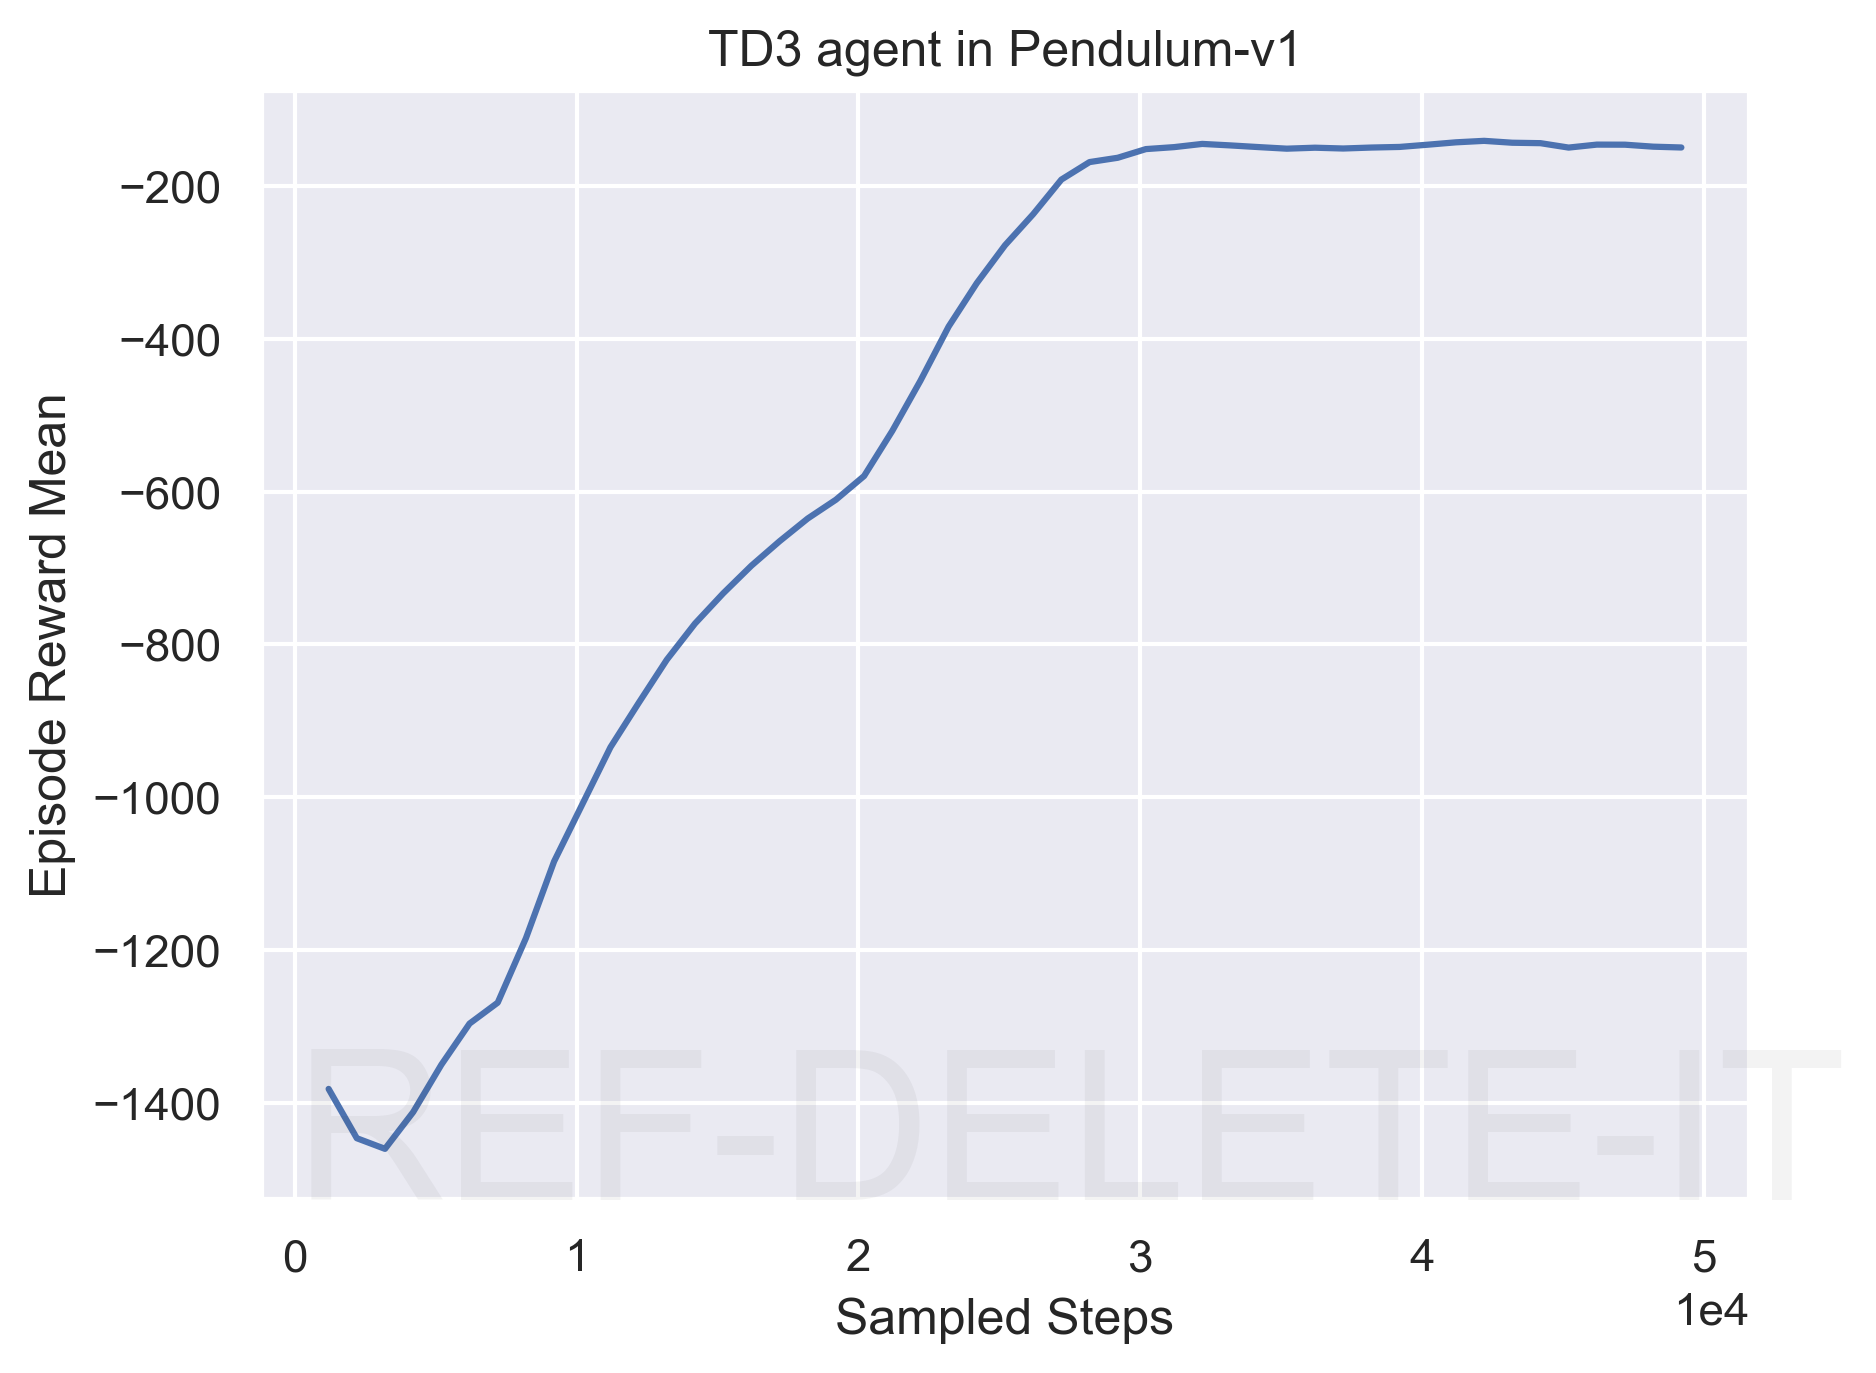

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0


In [5]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100000


/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[WARNING] environment_num is deprecated. Use num_scenarios instead! (metadrive_env.py:119)
[INFO] Assets version: 0.4.1.2
Training Step:   2%|▎                   | 1571/100000 [00:01<01:02, 1585.45it/s][INFO] Episode ended! Scenario Index: 1009 Reason: max step 

 ===== TD3 Training Step 1663 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 6.1030448135040345
  frame_per_second: 1394
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target

Training Step:  11%|██▏                 | 11017/100000 [00:13<08:21, 177.58it/s][INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.

 ===== TD3 Training Step 11020 =====:
  actor_loss: .nan
  critic_loss: 0.40268760919570923
  current_q1: 0.05719977617263794
  current_q2: 0.05837659165263176
  episode_reward: 0.34055977308021435
  frame_per_second: 784
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.019174570217728615
  success_rate: 0.0
  target_q: 0.028176475316286087
  total_episodes: 55
  total_steps: 11020
  total_time: 14.041916131973267

Training Step:  11%|██▏                 | 11070/100000 [00:14<08:55, 166.15it/s][INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
Training Step:  11%|██▏                 | 11108/100000 [00:14<08:35, 172.35it/s][INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
Training Step:  11%|██▏

Training Step:  13%|██▌                 | 12997/100000 [00:24<06:49, 212.39it/s][INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.

 ===== TD3 Training Step 13010 =====:
  actor_loss: .nan
  critic_loss: 0.5590380430221558
  current_q1: 0.05358884111046791
  current_q2: 0.042242925614118576
  episode_reward: -1.0468005173214703
  frame_per_second: 538
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.026162676513195038
  success_rate: 0.0
  target_q: 0.0008541359566152096
  total_episodes: 88
  total_steps: 13010
  total_time: 24.141336917877197

Training Step:  14%|██▊                 | 14038/100000 [00:29<07:41, 186.23it/s][INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.

 ===== TD3 Training Step 14039 =====:
  actor_loss: -0.06546719372272491
  critic_loss: 0.5349609851837158
  current_q1: 0.08410241454839706
  current_q2: 0.03300559148192406
  episode_reward: -1.9741543154419778
  frame_per_second: 474
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.0285302847

Training Step:  15%|███                 | 15027/100000 [00:34<07:12, 196.31it/s][INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 

 ===== TD3 Training Step 15040 =====:
  actor_loss: .nan
  critic_loss: 0.23055744171142578
  current_q1: 0.08311988413333893
  current_q2: 0.05165055766701698
  episode_reward: -0.08169114470529237
  frame_per_second: 430
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.0063880253583192825
  success_rate: 0.0
  target_q: 0.12142115831375122
  total_episodes: 142
  total_steps: 15040
  total_time: 34.958648920059204

Training Step:  16%|███▏                | 16022/100000 [00:40<07:22, 189.88it/s][INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.

 ===== TD3 Training Step 16031 =====:
  actor_loss: -0.33034050464630127
  critic_loss: 0.6419413089752197
  current_q1: 0.2607801556587219
  current_q2: 0.2633711099624634
  episode_reward: 3.9228948011105094
  frame_per_second: 398
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.00311421882

Training Step:  18%|███▌                | 18020/100000 [00:50<07:15, 188.31it/s][INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.

 ===== TD3 Training Step 18032 =====:
  actor_loss: .nan
  critic_loss: 0.20536914467811584
  current_q1: 0.9893028736114502
  current_q2: 1.0050451755523682
  episode_reward: 15.524947229384363
  frame_per_second: 354
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.1235414370894432
  success_rate: 0.0
  target_q: 1.0055744647979736
  total_episodes: 183
  total_steps: 18032
  total_time: 50.89059805870056

Training Step:  19%|███▊                | 19023/100000 [00:56<07:20, 183.98it/s][INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.

 ===== TD3 Training Step 19037 =====:
  actor_loss: -1.8038866519927979
  critic_loss: 0.4744126498699188
  current_q1: 1.5727039575576782
  current_q2: 1.6105372905731201
  episode_reward: 22.42504074820196
  frame_per_second: 337
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.11874367296695709
  succe

Training Step:  21%|████▏               | 21002/100000 [01:06<06:53, 191.02it/s][INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.

 ===== TD3 Training Step 21009 =====:
  actor_loss: -3.1665728092193604
  critic_loss: 0.740528404712677
  current_q1: 2.9992599487304688
  current_q2: 3.0562705993652344
  episode_reward: 38.95309674593837
  frame_per_second: 314
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.20367102324962616
  success_rate: 0.0
  target_q: 3.1979267597198486
  total_episodes: 218
  total_steps: 21009
  total_time: 66.9013159275055

Training Step:  22%|████▍               | 22120/100000 [01:12<07:20, 176.64it/s][INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 

 ===== TD3 Training Step 22129 =====:
  actor_loss: -4.164026737213135
  critic_loss: 0.8195955753326416
  current_q1: 3.945542097091675
  current_q2: 4.010987758636475
  episode_reward: 48.81423972630192
  frame_per_second: 302
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.23634670674800

Training Step:  25%|█████               | 25082/100000 [01:29<06:40, 187.13it/s][INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 

 ===== TD3 Training Step 25099 =====:
  actor_loss: -7.300014972686768
  critic_loss: 1.2756496667861938
  current_q1: 7.0755205154418945
  current_q2: 7.087664604187012
  episode_reward: 72.55091906540669
  frame_per_second: 280
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.27597102522850037
  success_rate: 0.0
  target_q: 6.888950347900391
  total_episodes: 254
  total_steps: 25099
  total_time: 89.56466507911682

Training Step:  26%|█████▏              | 26040/100000 [01:34<06:34, 187.52it/s][INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.

 ===== TD3 Training Step 26058 =====:
  actor_loss: .nan
  critic_loss: 4.093628406524658
  current_q1: 7.452542781829834
  current_q2: 7.407849311828613
  episode_reward: 77.09530612240705
  frame_per_second: 275
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.2713339626789093
  success_rat

Training Step:  30%|██████              | 30011/100000 [01:55<06:03, 192.38it/s][INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.

 ===== TD3 Training Step 30024 =====:
  actor_loss: .nan
  critic_loss: 8.089547157287598
  current_q1: 11.842062950134277
  current_q2: 11.828420639038086
  episode_reward: 99.50203440595632
  frame_per_second: 259
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.3384948670864105
  success_rate: 0.0
  target_q: 11.335929870605469
  total_episodes: 297
  total_steps: 30024
  total_time: 115.804368019104

Training Step:  31%|██████▏             | 31015/100000 [02:01<06:42, 171.41it/s][INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.

 ===== TD3 Training Step 31021 =====:
  actor_loss: -13.594501495361328
  critic_loss: 2.5157318115234375
  current_q1: 13.099517822265625
  current_q2: 13.109918594360352
  episode_reward: 103.54305991603356
  frame_per_second: 255
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.43229764699935913
  success_

Training Step:  34%|██████▊             | 34012/100000 [02:17<05:55, 185.56it/s][INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 

 ===== TD3 Training Step 34030 =====:
  actor_loss: .nan
  critic_loss: 5.676011085510254
  current_q1: 15.473214149475098
  current_q2: 15.419221878051758
  episode_reward: 106.12591957847013
  frame_per_second: 246
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4051712453365326
  success_rate: 0.0
  target_q: 15.925862312316895
  total_episodes: 332
  total_steps: 34030
  total_time: 137.9330449104309

Training Step:  35%|███████             | 35046/100000 [02:23<05:56, 182.23it/s][INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.

 ===== TD3 Training Step 35055 =====:
  actor_loss: -18.023487091064453
  critic_loss: 15.098240852355957
  current_q1: 17.901941299438477
  current_q2: 17.892213821411133
  episode_reward: 108.4489328788649
  frame_per_second: 243
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4358782470226288
  succes

Training Step:  38%|███████▌            | 38055/100000 [02:39<05:52, 175.53it/s][INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 

 ===== TD3 Training Step 38067 =====:
  actor_loss: -20.35259246826172
  critic_loss: 2.8796226978302
  current_q1: 20.1048526763916
  current_q2: 20.101837158203125
  episode_reward: 104.77172671679917
  frame_per_second: 237
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5580637454986572
  success_rate: 0.0
  target_q: 20.367212295532227
  total_episodes: 372
  total_steps: 38067
  total_time: 160.0558922290802

Training Step:  39%|███████▊            | 39084/100000 [02:45<05:17, 192.09it/s][INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 

 ===== TD3 Training Step 39098 =====:
  actor_loss: .nan
  critic_loss: 10.137340545654297
  current_q1: 20.866453170776367
  current_q2: 20.932071685791016
  episode_reward: 106.1964925534505
  frame_per_second: 235
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.48805946111679077
  success_

Training Step:  42%|████████▍           | 42160/100000 [03:02<05:27, 176.42it/s][INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 

 ===== TD3 Training Step 42169 =====:
  actor_loss: -25.451709747314453
  critic_loss: 13.199430465698242
  current_q1: 25.123058319091797
  current_q2: 25.017826080322266
  episode_reward: 102.14350201315216
  frame_per_second: 230
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5531867742538452
  success_rate: 0.0
  target_q: 25.09891128540039
  total_episodes: 408
  total_steps: 42169
  total_time: 182.67441701889038

Training Step:  43%|████████▌           | 43063/100000 [03:07<05:23, 176.05it/s][INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 

 ===== TD3 Training Step 43069 =====:
  actor_loss: -27.087112426757812
  critic_loss: 16.14276123046875
  current_q1: 26.418550491333008
  current_q2: 26.35171890258789
  episode_reward: 105.6000201914475
  frame_per_second: 229
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.578550457

Training Step:  48%|█████████▋          | 48176/100000 [03:35<04:53, 176.76it/s][INFO] Episode ended! Scenario Index: 1009 Reason: arrive_dest.

 ===== TD3 Training Step 48193 =====:
  actor_loss: -32.510902404785156
  critic_loss: 7.1608967781066895
  current_q1: 31.87384605407715
  current_q2: 31.73282814025879
  episode_reward: 126.81302204284198
  frame_per_second: 223
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6163784265518188
  success_rate: 0.02
  target_q: 31.897531509399414
  total_episodes: 440
  total_steps: 48193
  total_time: 216.10686612129211

Training Step:  49%|█████████▊          | 49340/100000 [03:42<04:18, 196.10it/s][INFO] Episode ended! Scenario Index: 1013 Reason: arrive_dest.

 ===== TD3 Training Step 49354 =====:
  actor_loss: .nan
  critic_loss: 7.001801013946533
  current_q1: 31.54448699951172
  current_q2: 31.55394172668457
  episode_reward: 131.9074208144652
  frame_per_second: 221
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.628603458404541
  success_rat

Training Step:  57%|███████████▍        | 57119/100000 [04:25<04:02, 176.74it/s][INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 

 ===== TD3 Training Step 57133 =====:
  actor_loss: -37.480552673339844
  critic_loss: 2.9636752605438232
  current_q1: 37.18903350830078
  current_q2: 37.46769714355469
  episode_reward: 163.17603727136313
  frame_per_second: 215
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6133679151535034
  success_rate: 0.11
  target_q: 37.315345764160156
  total_episodes: 464
  total_steps: 57133
  total_time: 265.39819502830505

Training Step:  59%|███████████▊        | 58812/100000 [04:34<03:11, 214.69it/s][INFO] Episode ended! Scenario Index: 1005 Reason: max step 

 ===== TD3 Training Step 58833 =====:
  actor_loss: -38.36674499511719
  critic_loss: 10.381308555603027
  current_q1: 37.94633865356445
  current_q2: 37.823001861572266
  episode_reward: 167.44080233136495
  frame_per_second: 214
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6325700283050

Training Step:  64%|████████████▊       | 64126/100000 [05:04<03:31, 169.35it/s][INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.

 ===== TD3 Training Step 64137 =====:
  actor_loss: -40.03926086425781
  critic_loss: 4.883543968200684
  current_q1: 39.63243103027344
  current_q2: 39.69293975830078
  episode_reward: 188.73627719929428
  frame_per_second: 210
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6069737076759338
  success_rate: 0.15
  target_q: 39.80156326293945
  total_episodes: 491
  total_steps: 64137
  total_time: 304.36516213417053

Training Step:  65%|█████████████       | 65082/100000 [05:09<02:59, 194.49it/s][INFO] Episode ended! Scenario Index: 1001 Reason: arrive_dest.

 ===== TD3 Training Step 65098 =====:
  actor_loss: .nan
  critic_loss: 13.952701568603516
  current_q1: 40.45565414428711
  current_q2: 40.627845764160156
  episode_reward: 194.03667805871416
  frame_per_second: 210
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5942062139511108
  success_ra

Training Step:  73%|██████████████▋     | 73161/100000 [05:54<02:10, 206.22it/s][INFO] Episode ended! Scenario Index: 1010 Reason: arrive_dest.

 ===== TD3 Training Step 73175 =====:
  actor_loss: -40.45919418334961
  critic_loss: 7.902660369873047
  current_q1: 39.26382064819336
  current_q2: 39.10563659667969
  episode_reward: 228.14044260846632
  frame_per_second: 206
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6029456257820129
  success_rate: 0.27
  target_q: 39.77253723144531
  total_episodes: 518
  total_steps: 73175
  total_time: 354.1956720352173

Training Step:  74%|██████████████▊     | 74104/100000 [05:59<02:28, 174.76it/s][INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 

 ===== TD3 Training Step 74104 =====:
  actor_loss: .nan
  critic_loss: 20.232574462890625
  current_q1: 42.3575439453125
  current_q2: 42.53260040283203
  episode_reward: 231.28961780684145
  frame_per_second: 206
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5980045795440674
  success_rat

Training Step:  82%|████████████████▍   | 82090/100000 [06:43<01:32, 193.12it/s][INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.

 ===== TD3 Training Step 82112 =====:
  actor_loss: .nan
  critic_loss: 8.407072067260742
  current_q1: 42.51044845581055
  current_q2: 42.72011184692383
  episode_reward: 245.28518193879646
  frame_per_second: 203
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.659131646156311
  success_rate: 0.37
  target_q: 43.15058898925781
  total_episodes: 544
  total_steps: 82112
  total_time: 403.93302392959595

Training Step:  83%|████████████████▌   | 83041/100000 [06:49<01:25, 197.80it/s][INFO] Episode ended! Scenario Index: 1013 Reason: arrive_dest.

 ===== TD3 Training Step 83049 =====:
  actor_loss: -41.26410675048828
  critic_loss: 9.484113693237305
  current_q1: 40.95125961303711
  current_q2: 41.08747482299805
  episode_reward: 247.21559755779046
  frame_per_second: 202
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6913988590240479
  success_rate:

Training Step:  91%|██████████████████▏ | 91217/100000 [07:35<00:44, 196.63it/s][INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.

 ===== TD3 Training Step 91236 =====:
  actor_loss: .nan
  critic_loss: 7.8654561042785645
  current_q1: 42.998931884765625
  current_q2: 43.05459213256836
  episode_reward: 265.5469811586517
  frame_per_second: 200
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.7018587589263916
  success_rate: 0.45
  target_q: 43.305389404296875
  total_episodes: 565
  total_steps: 91236
  total_time: 455.2608280181885

Training Step:  92%|██████████████████▍ | 92479/100000 [07:42<00:38, 195.18it/s][INFO] Episode ended! Scenario Index: 1015 Reason: arrive_dest.

 ===== TD3 Training Step 92498 =====:
  actor_loss: .nan
  critic_loss: 25.767539978027344
  current_q1: 44.738014221191406
  current_q2: 44.55572509765625
  episode_reward: 269.84494787653875
  frame_per_second: 200
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6401333808898926
  success_rate: 0.47
  ta

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


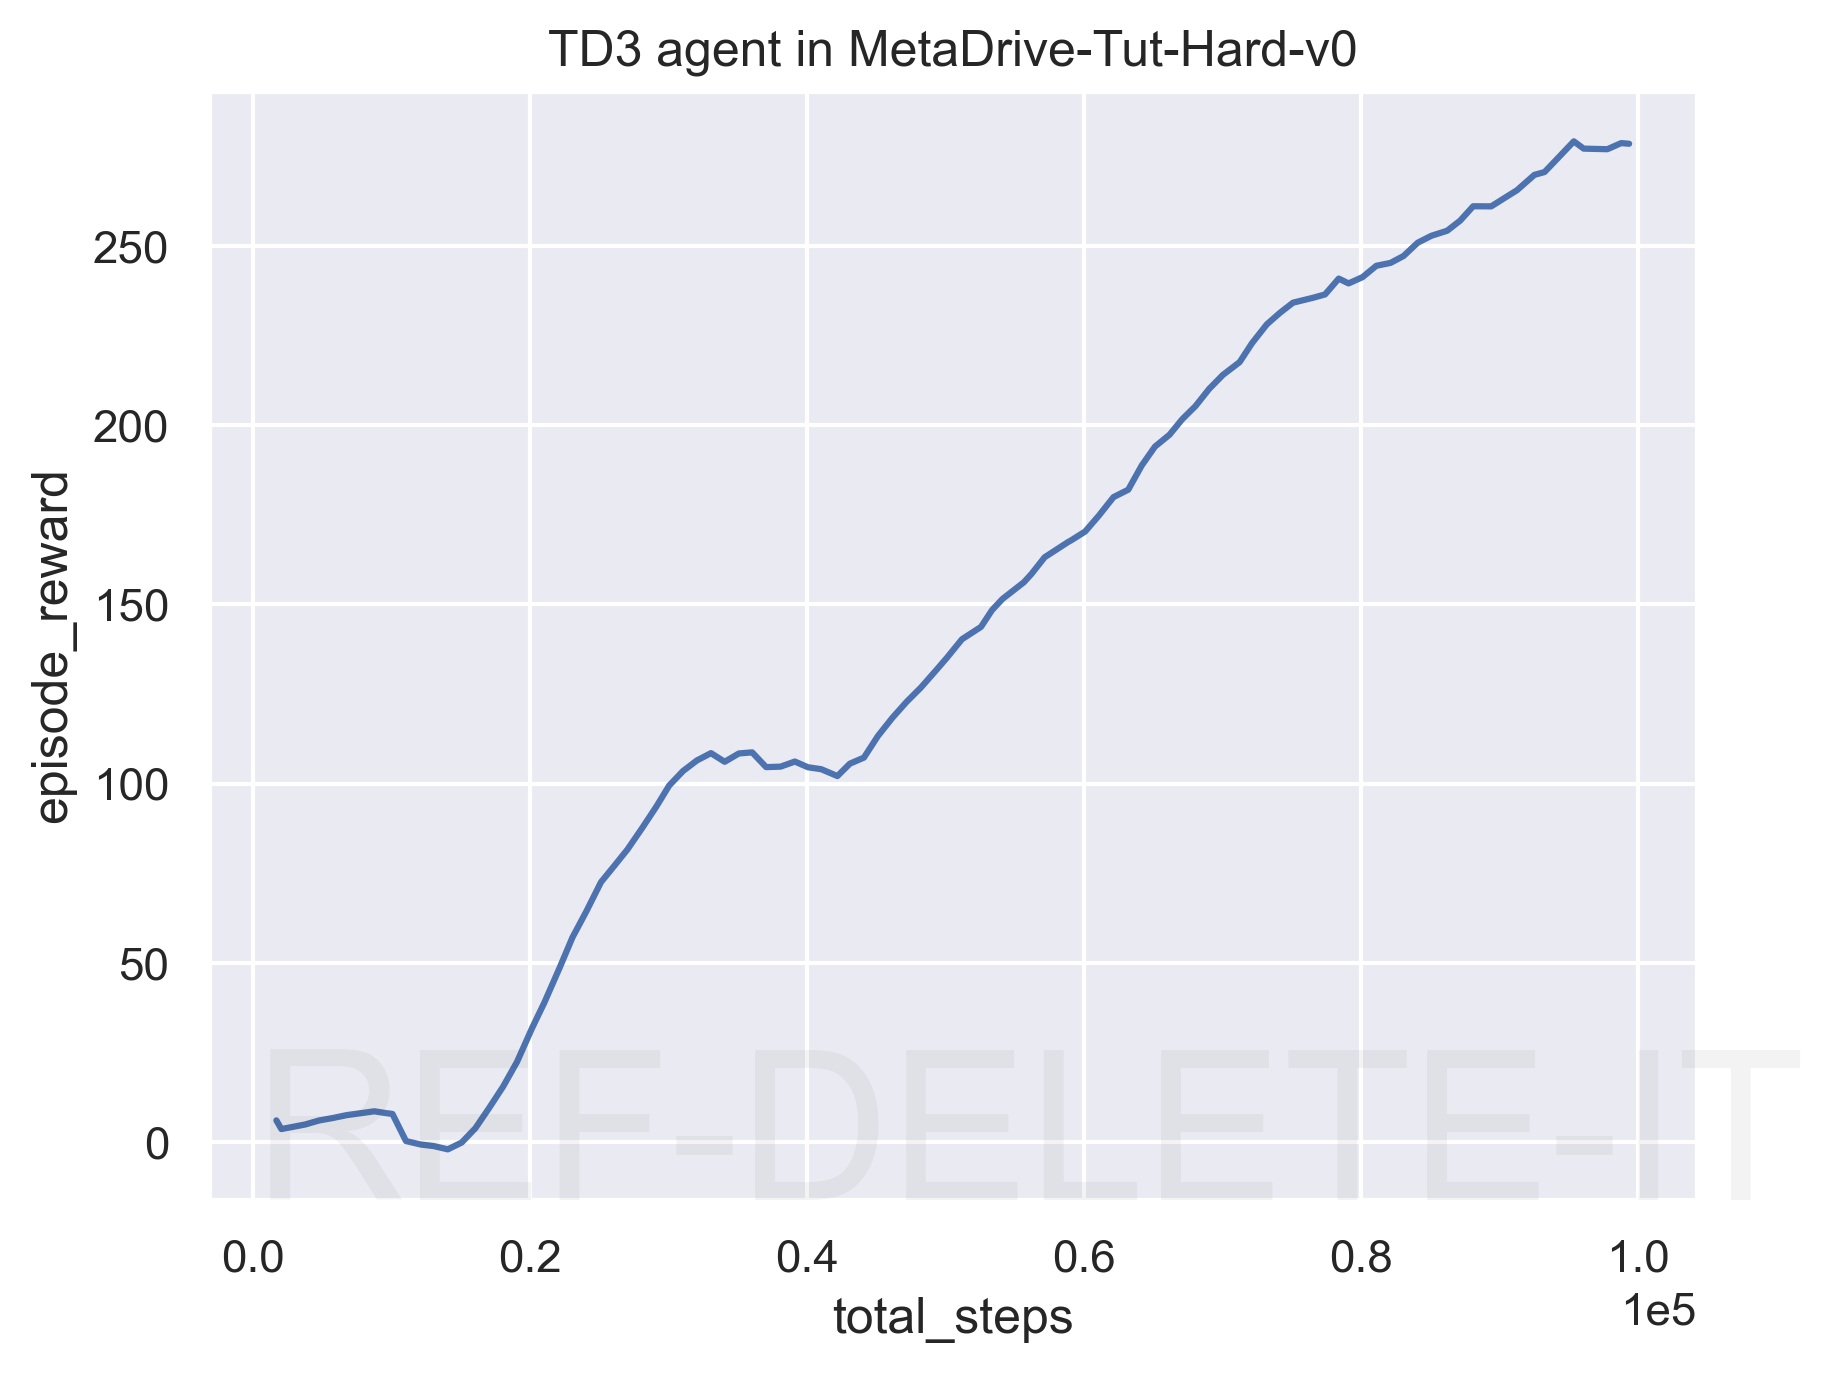

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation (bias) and the variance of advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [21]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
Start training!
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/

 73%|███████████████████████▍        | 220000/300000 [00:20<00:07, 10912.41it/s]
 ===== ppo Training Iteration 11 =====:
  adv_mean: 1.6011409759521484
  entropy: 0.5129285705777314
  episode_reward: 444.85
  frame_per_second: 10445
  grad_norm: 81.4640530879681
  iteration: 11
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/CartPole-v1/ppo
  policy_loss: -0.001803871984175669
  ratio: 1.000088465366608
  total_episodes: 2555
  total_loss: 100.06688039975289
  total_steps: 240000
  total_time: 22.975874662399292
  value_loss: 100.06868372697096

 80%|█████████████████████████▌      | 240000/300000 [00:21<00:05, 10921.10it/s]
 ===== ppo Training Iteration 12 =====:
  adv_mean: 1.3186222314834595
  entropy: 0.486465104841269
  episode_reward: 464.29
  frame_per_second: 10482
  grad_norm: 73.17271897487151
  iteration: 12
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/CartPole-v1/ppo
  polic

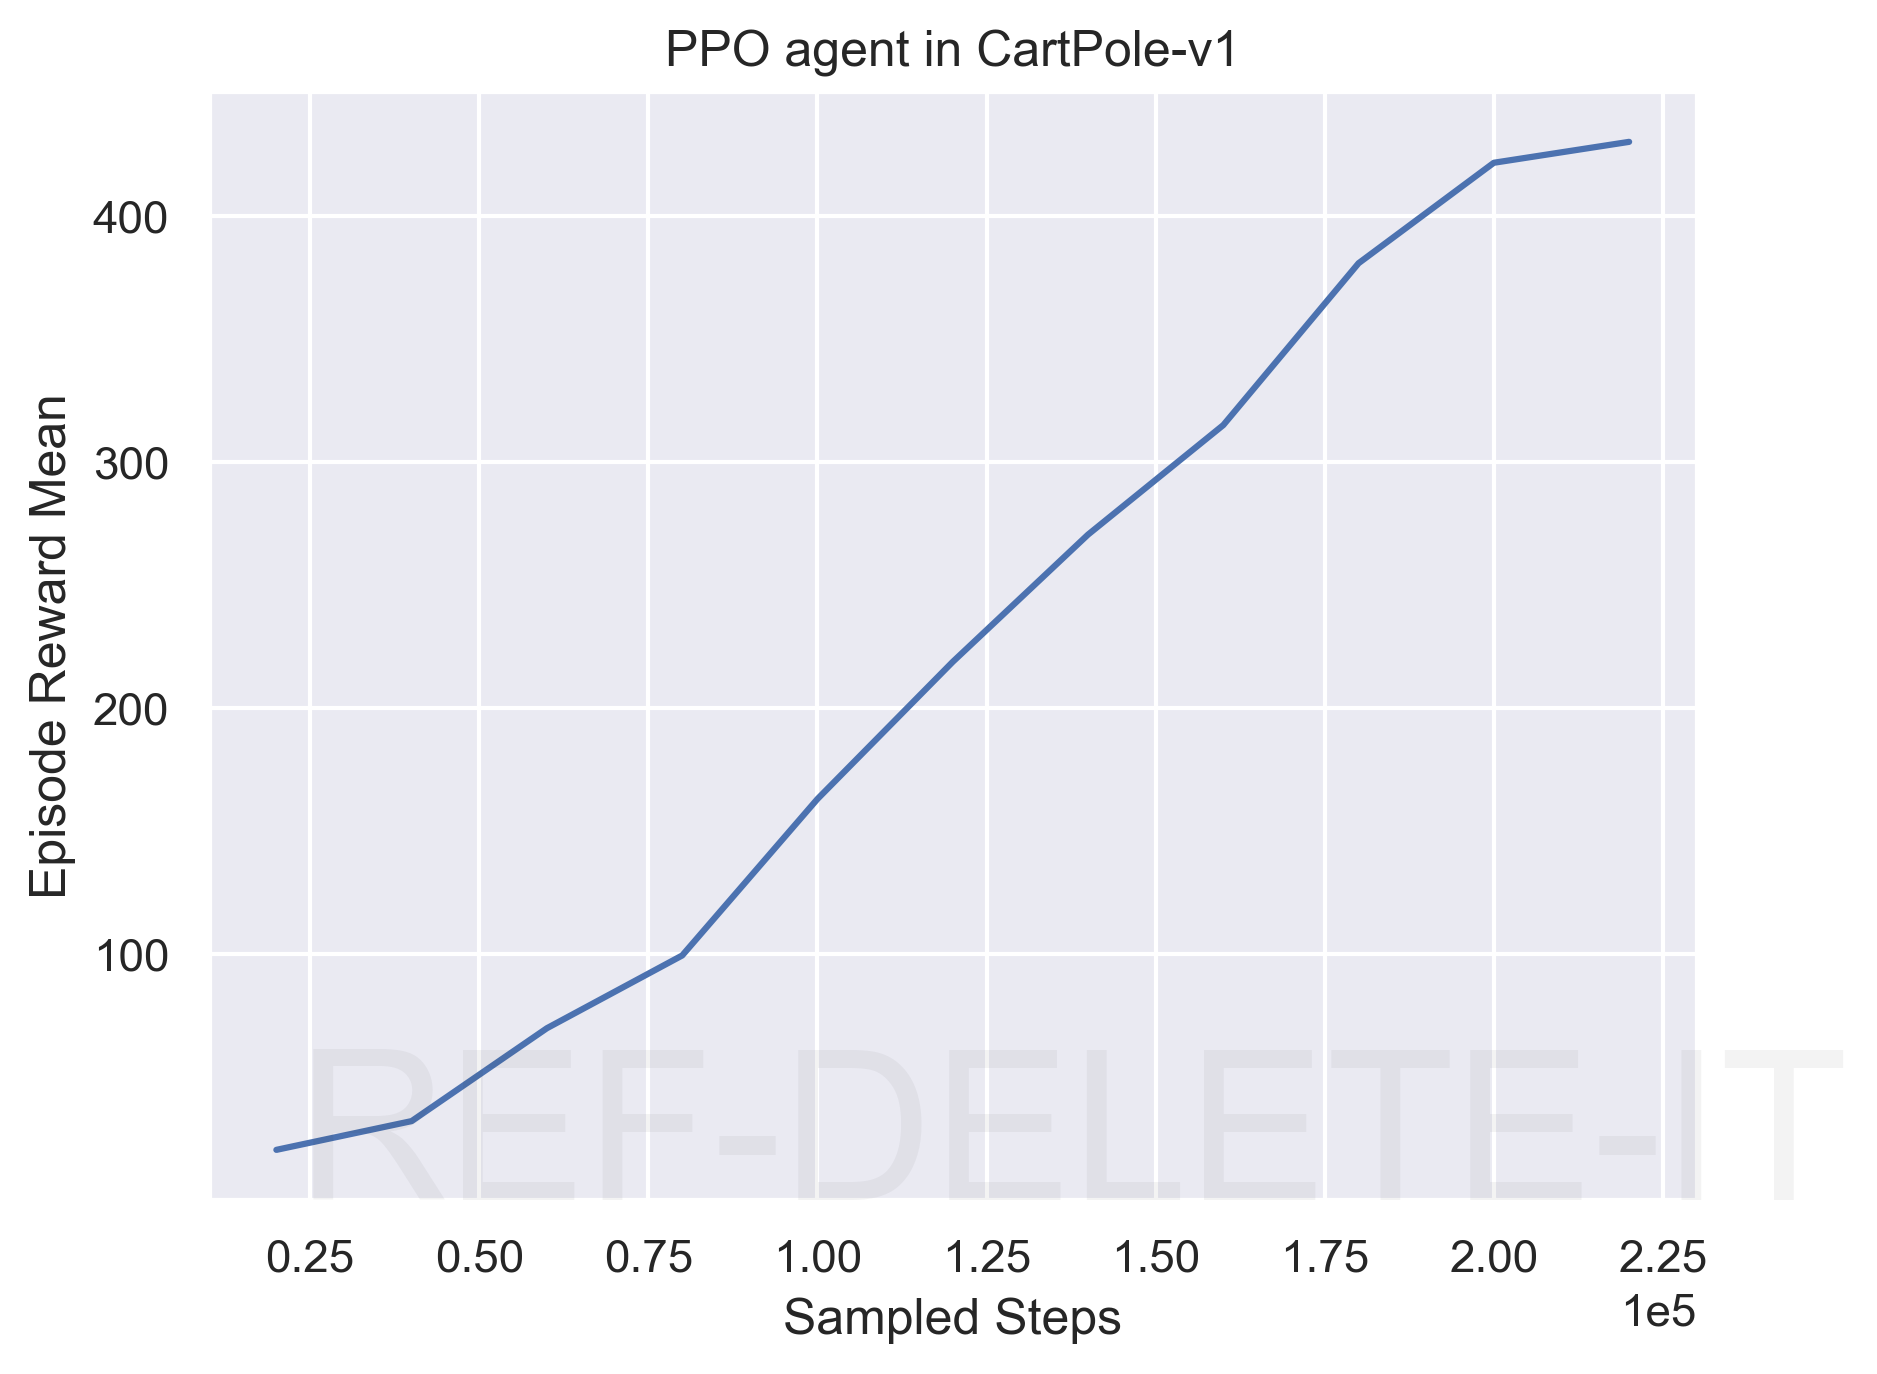

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("REF-DELETE-IT", (ax.get_xlim()[1] / 10, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Hard Env.

In [23]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
/Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[WARNING

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1016 Reason: max step 
[INFO] Episode ended! Scenario Index: 1008 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1009 Reason: max step 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: max step 
[INFO] Episode ended! Scenario Index: 1008 Reason: max step 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.

 ===== ppo Training Iteration 0 =====:
  adv_mean: 0.16933411359786987
  entropy: 2.8003244714859203
  episode_reward: 6.942845

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: max step 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: max step 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: max step 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: max 

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.

 ===== ppo Training Iteration 7 =====:


[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.

 ===== ppo Training Iteration 11 =====:
  adv_mean: 4.197841644287109
  entropy: 1.8324062491074586
  episode_reward: 108.97684965342077
  frame_per_second: 2466
  grad_norm: 60.662652706488586
  iteration: 11
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.004926030456315344
  ratio: 0.9999387067097883
  success_rate: 0.02
  total_episodes: 668
  total_loss: 19.4431665909596
  total_steps: 240000
  total_time: 97.31937193870544
  value_loss: 19.44809261346475

 24%|███████▋                        | 240000/1000000 [01:35<05:11, 2437.92it/s][INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

 26%|████████▎                       | 260000/1000000 [01:44<05:08, 2402.17it/s][INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

 30%|█████████▌                      | 300000/1000000 [02:01<04:55, 2367.60it/s][INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: arrive_dest.
[INFO] Episode ended! 

 32%|██████████▏                     | 320000/1000000 [02:09<04:47, 2367.13it/s][INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode e

 34%|██████████▉                     | 340000/1000000 [02:19<04:46, 2301.32it/s][INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode end

[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.

 ===== ppo Training Iteration 17 =====:
  adv_mean: 1.531401515007019
  entropy: 1.5827304381590623
  episode_reward: 116.65934610473934
  frame_per_second: 2405
  grad_norm: 324.1477079831637
  iteration: 17
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0033128286132780025
  ratio: 1.0007858844139637
  success_rate: 0.01
  

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.

 ===== ppo Training Iteration 18 =====:
  adv_mean: 2.5601046085357666
  entropy: 1.5519589665608529
  episode_reward: 144.89084256833027
  frame_per_second: 2393
  grad_norm: 372.6916030492538
  iteration: 18
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignmen

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended

[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.

 ===== ppo Training Iteration 29 =====:
  adv_mean: 0.13810232281684875
  entropy: 1.2555608252684276
  episode_reward: 157.76428963977193
  frame_per_second: 2303
  grad_norm: 888.472496287028
  iteration: 29
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 0.0012541473601371622
  ratio: 0.9995943827506824
  success_rate: 0.02
  total_episodes: 2564
  total_loss: 99.06499665089143
  total_steps: 600000
  total_time: 260.5175859928131
  value_loss: 99.06374248113387

 60%|███████████████████▏            | 600000/1000000 [04:18<03:06, 2139.78it/s][INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 

 ===== ppo Training Iteration 30 =====:
  adv_mean: -0.16823111474514008
  entropy: 1.2152010553922408
  episode_reward: 159.85129617458514
  frame_per_second: 2299
  grad_norm: 988.1501365074745
  iteration: 30
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: arrive_dest.
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.

 ===== ppo Training Iteration 43 =====:
  adv_mean: 0.42023149132728577
  entropy: 0.9806554039319356
  episode_reward: 159.8342186964248
  frame_per_second: 2253
  grad_norm: 1266.7808274097931
  iteration: 43
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0013334285435027992
  ratio: 1.0002003345734034
  success_rate: 0.07
  total_episodes: 4057
  total_loss: 84.7414910536546
  total_steps: 880000
  total_time: 390.5405750274658
  value_loss: 84.74282432947403

 88%|████████████████████████████▏   | 880000/10000

[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1015 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.

 ===== ppo Training Iteration 44 =====:
  adv_mean: 0.10032976418733597
  entropy: 1.0440879749946106
  episode_reward: 177.43001596409863
  frame_per_second: 2250
  grad_norm: 1351.7282368977865
  iteration: 44
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 0.0

[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 

 ===== ppo Training Iteration 45 =====:
  adv_mean: 0.9006220698356628
  entropy: 1.0479744399969395
  episode_reward: 186.6595984107826
  frame_per_second: 2247
  grad_norm: 1340.9136185083635
  iteration: 45
  log_dir: /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.

 94%|██████████████████████████████  | 940000/1000000 [06:56<00:27, 2155.77it/s][INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode e

[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1006 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scen

100%|███████████████████████████████| 1000000/1000000 [07:25<00:00, 2117.07it/s][INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode e

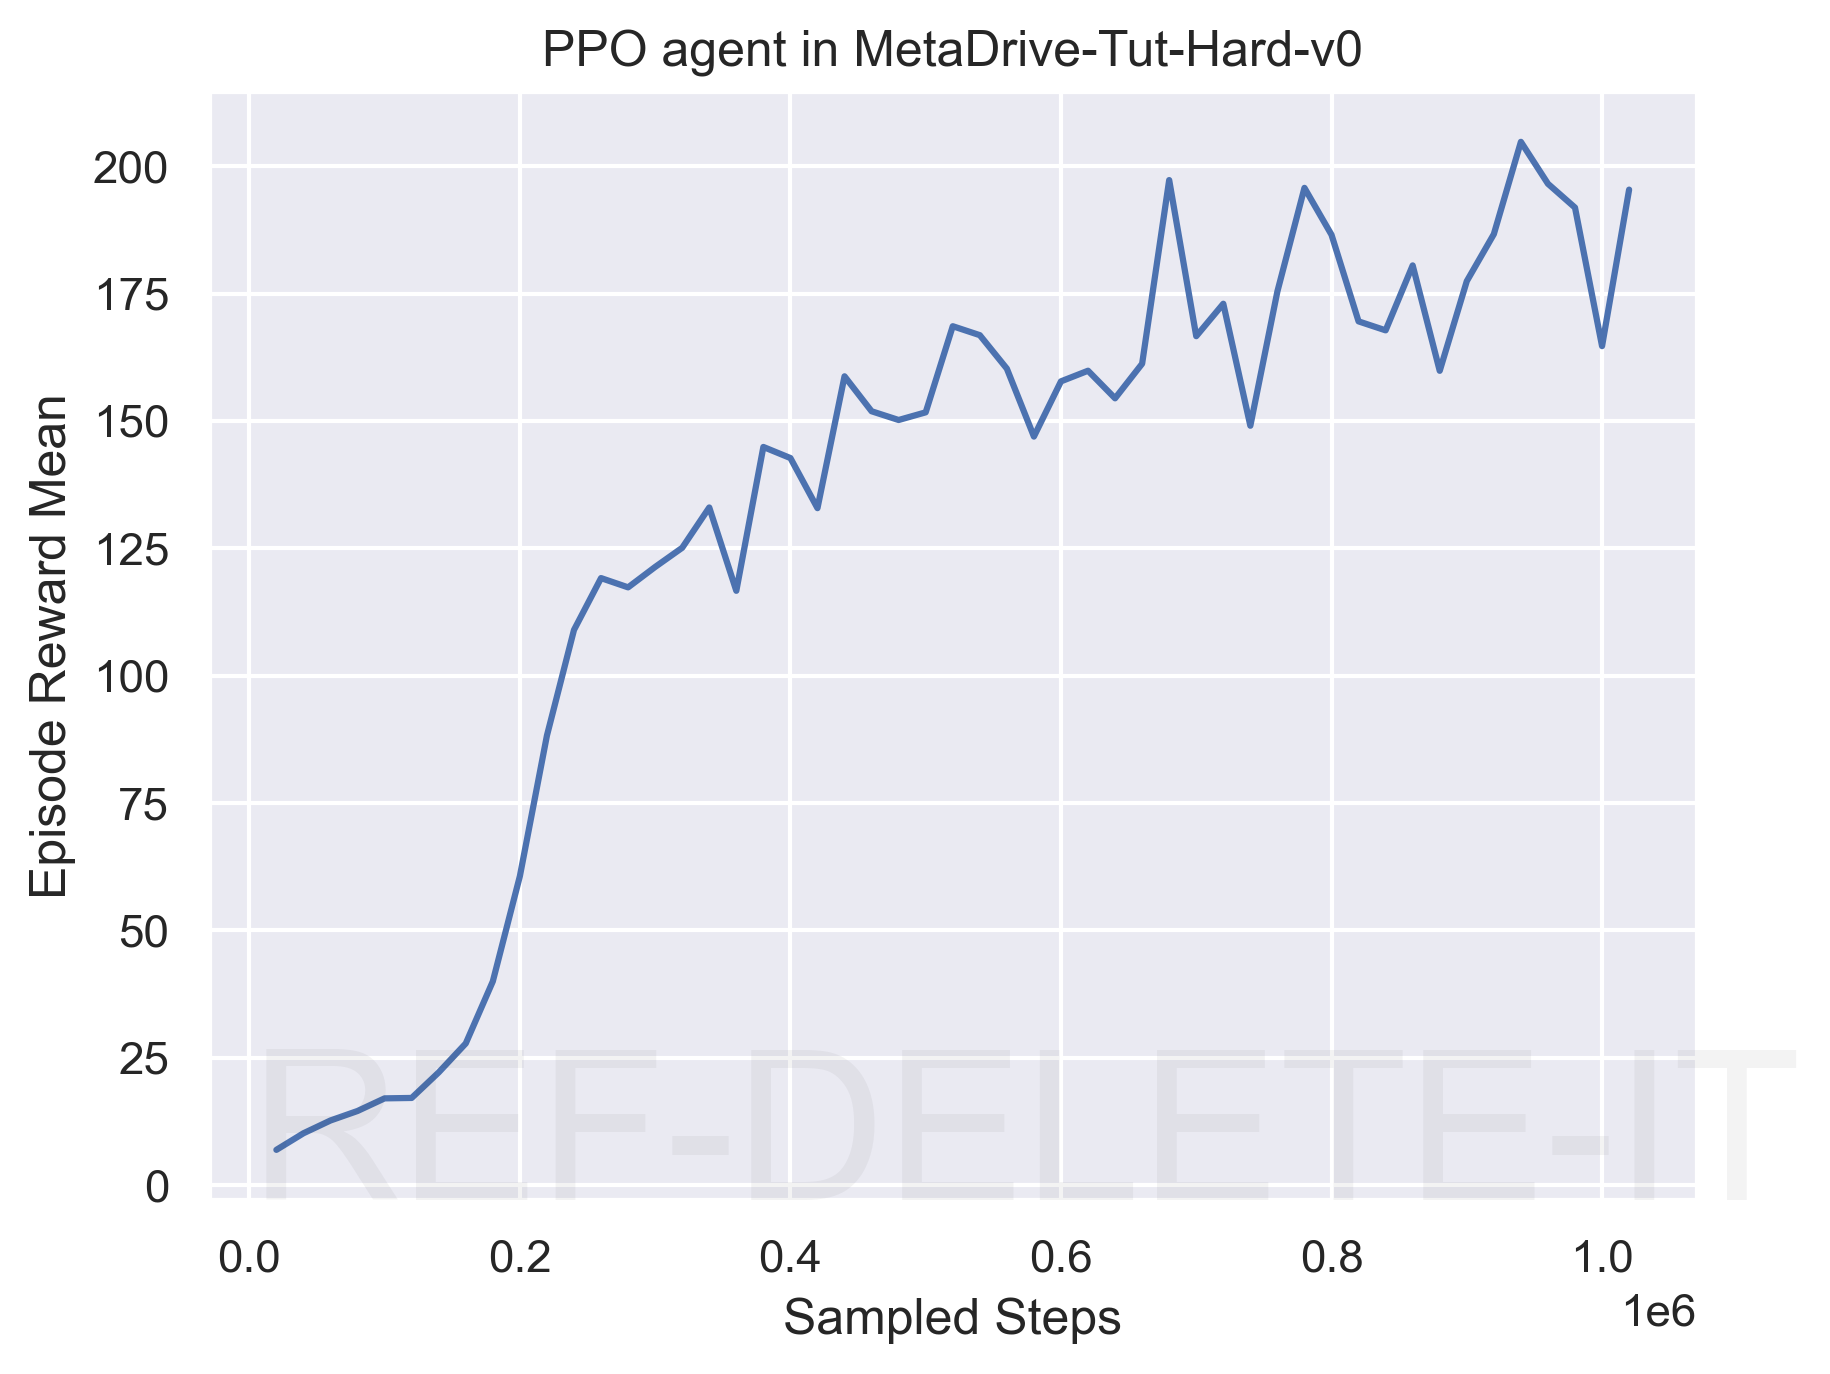

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected. You don't need to submit the video to anywhere.

In [27]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]

animate(frames)

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

environment_num is deprecated. Use num_scenarios instead!
environment_num is deprecated. Use num_scenarios instead!


Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from /Users/haniyeh/Documents/University/Reinforcement Learning/Assignments/A3/assignment3/MetaDrive-Tut-Hard-v0/ppo/checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 25.155
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 79.537
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 139.725
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 176.856
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 217.276
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 264.347
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 282.731
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 318.836


PPO agent achieves 355.58443811222907 return in MetaDrive Hard environment.


## Demo 5: Generalization Experiments

Here we draw the figures of generalization experiments. You can always find that when training in the environment with only one sceanrio, the test performance is poor.

Due to computing resource limit, we do not require you train the agent in the same environment for multiple time. However, this leads to huge instability in the performance and the curves do not look reasonable as it is in the paper. Repeating multiple times of experiments with different random seeds can relieve this issue.

We provide `train_[ppo|td3].py`, `eval_[ppo|td3].py`, `[ppo|td3]_generalization_train.sh` and `[ppo|td3]_generalization_eval.sh`. You can refer to them for more information.

You only need to pick one algorithm and run the generalization experiments. See `result.md` for more details.


References:

The Figure 8 in [MetaDrive paper](https://arxiv.org/pdf/2109.12674.pdf).

The Figure 2 in [ProcGen paper](http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf).



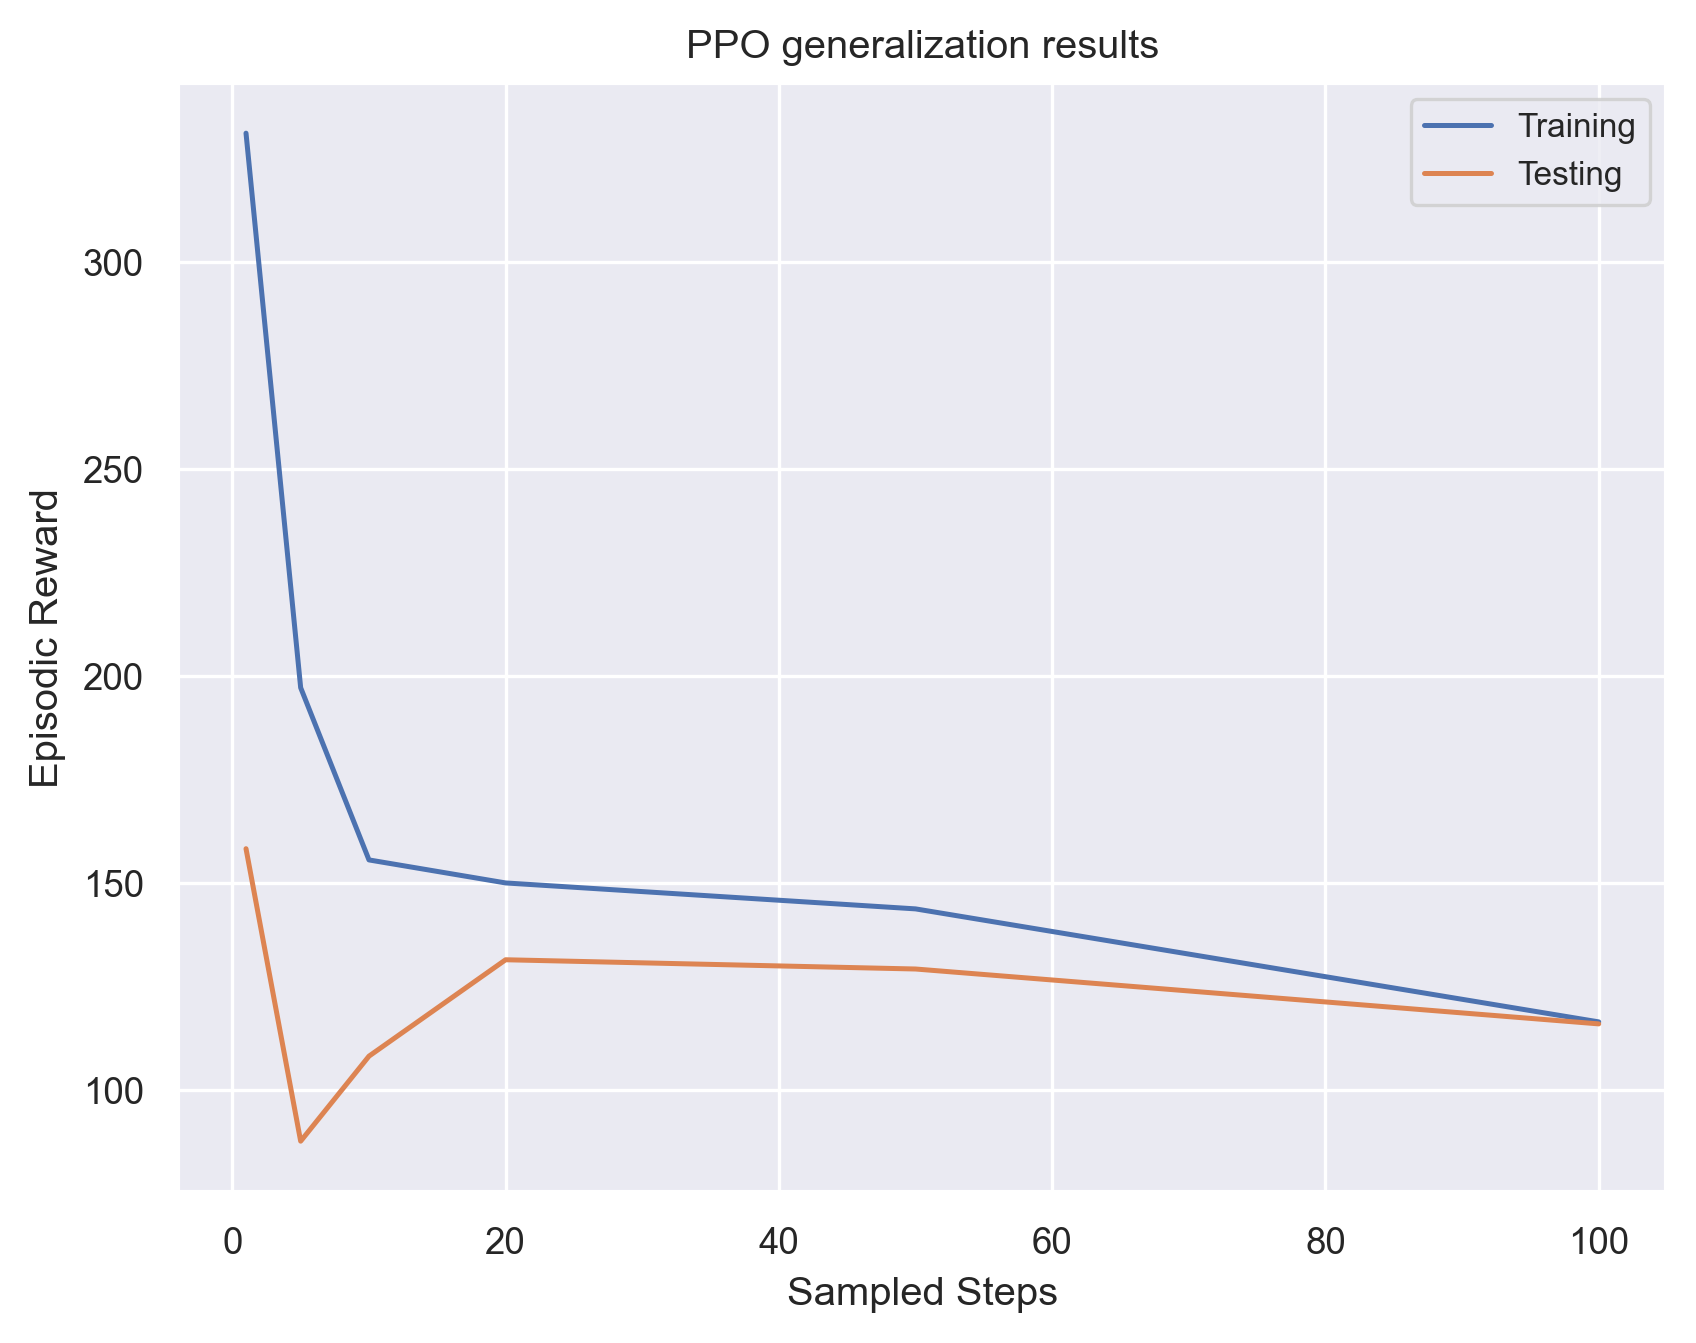

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("PPO generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")


# Note: The following figure is for reference used only, you don't need to repreduce it.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("TD3 generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")


# Note: The following figure is for reference used only, you don't need to repreduce it.

You can run script in this notebook.

In [ ]:
!python eval_ppo.py --log-dir MetaDrive-Tut-Easy-v0/ppo --num-envs 2

In [ ]:
!python eval_gail.py --log-dir MetaDrive-Tut-Easy-v0/gail --num-envs 2 --num-episodes 5